#**Menampilkan gambar**

## Membaca file citra dengan cv2.imshow

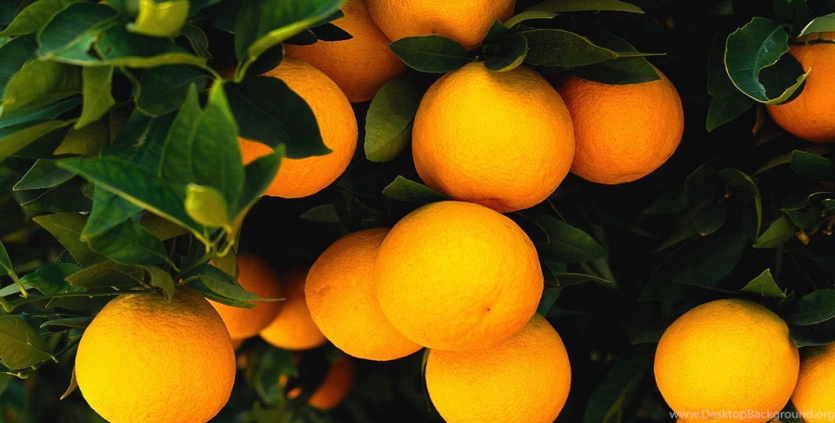

<class 'numpy.ndarray'>


In [ ]:
# memanggil library opencv
import cv2
from google.colab.patches import cv2_imshow
 
# membuka gambar dengan fungsi imread dari OpenCV
img = cv2.imread('/content/orange.jpg')
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya
 
# menampilkan gambar dengan fungsi cv2.imshow()
cv2_imshow(img)

# menunda untuk menutup jendela
cv2.waitKey(0)
 
# lihat tipe data img. disimpan sebagai apa?
print(type(img))


## Menampilkan citra dengan matplotlib

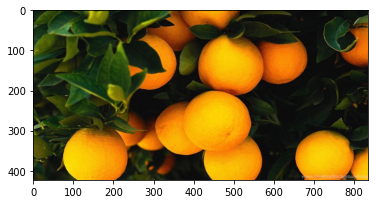

In [ ]:
# memanggil library opencv
import cv2
import matplotlib.pyplot as plt

# membuka gambar dengan fungsi imread dari OpenCV
img = cv2.imread('/content/orange.jpg') 
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya
 
# konversi gambar dari BGR ke RGB untuk matplotlib
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# menampilkan gambar dengan fungsi imshow()
plt.imshow(img)


# **Channel (Band/pita)**

Mendapatkan jumlah channel dalam citra

In [ ]:
# memanggil library opencv
import cv2

# membuka gambar dengan fungsi imread dari OpenCV
img = cv2.imread('/content/orange.jpg') 
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya
print (img.shape)


(423, 835, 3)


# **Ekstraksi Channel**

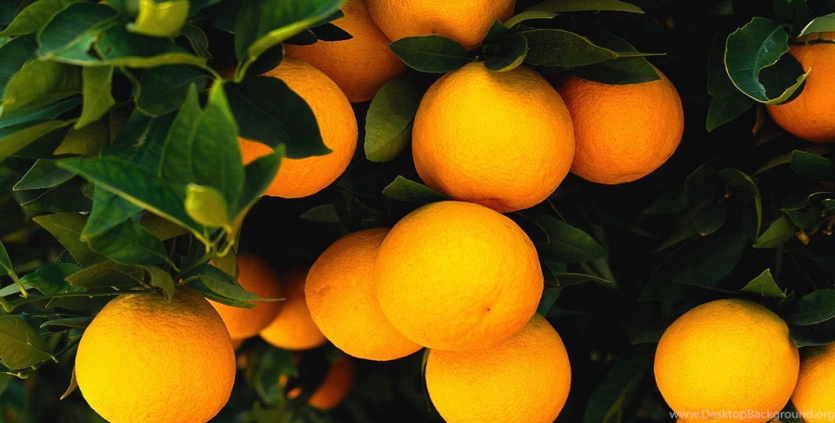

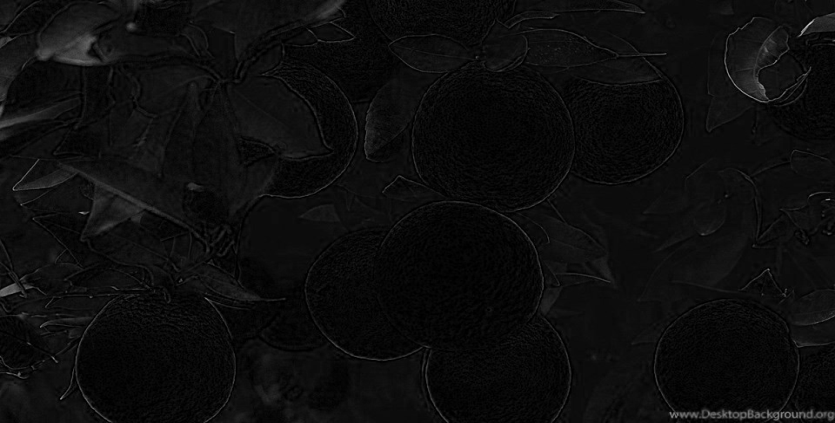

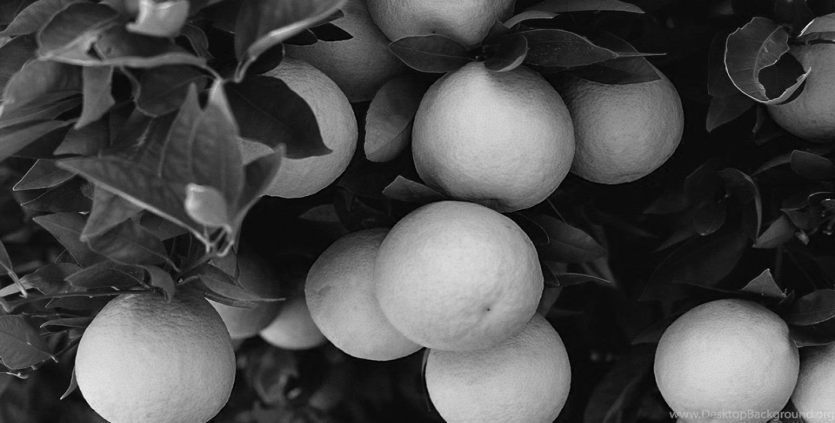

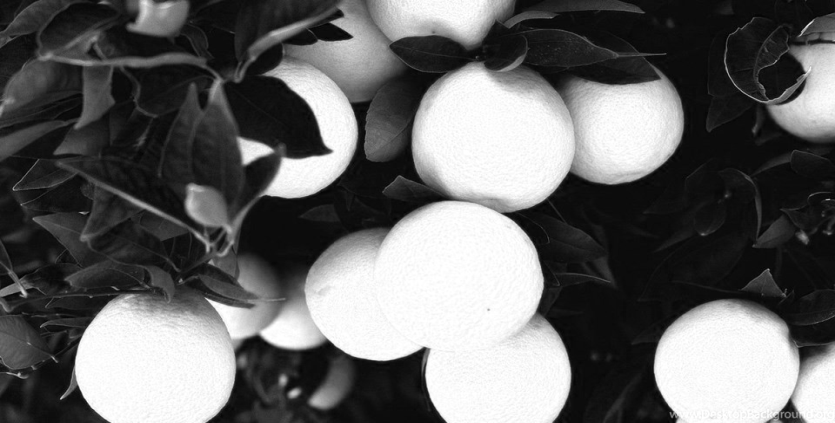

In [ ]:
# Memisahkan channel dari citra

import cv2 
img = cv2.imread('/content/orange.jpg')
  
cv2_imshow(img)

# Chanell blue, green dan red masng-masing disimpan pada variabel b,g,r
b,g,r = cv2.split(img)

# Menampilkan channel blue
cv2_imshow(b)
  
# Menampilkan channel green
cv2_imshow(g)
  
# Menampilkan channel red
cv2_imshow(r)

# **Transformasi citra RGB ke Grayscale**

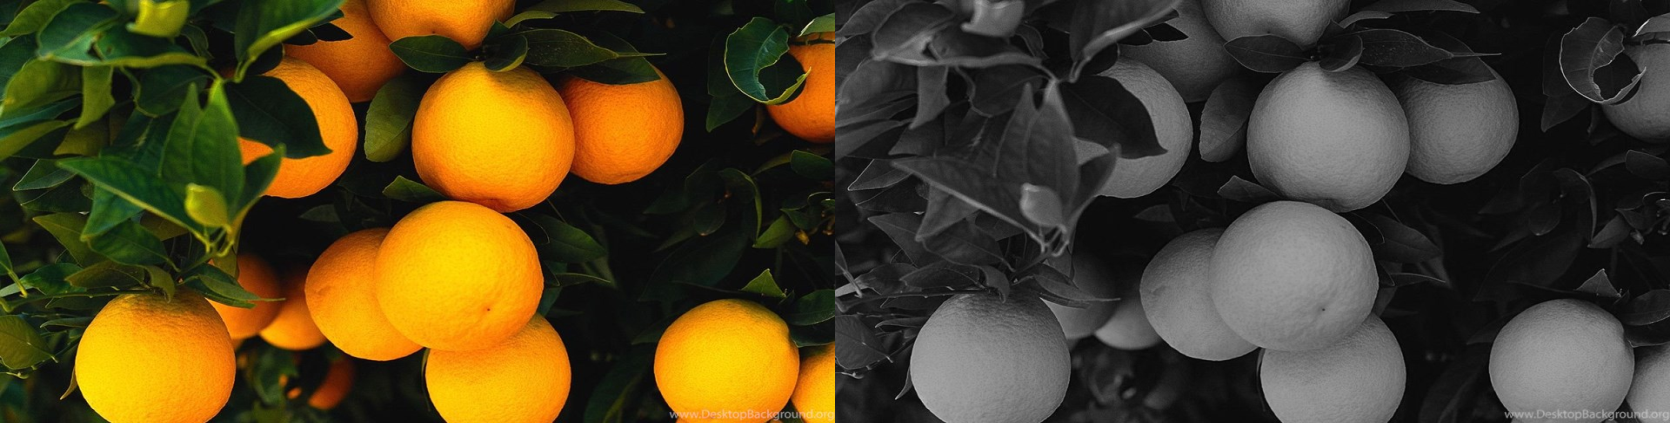

-1

In [ ]:
import cv2
import numpy as np
 
imgFruit = cv2.imread('/content/orange.jpg')
grayFruit = cv2.cvtColor(imgFruit, cv2.COLOR_RGB2GRAY)
 
grayFruit_3_channel = cv2.cvtColor(grayFruit, cv2.COLOR_GRAY2BGR)
image_show = np.hstack((imgFruit, grayFruit_3_channel))
cv2_imshow(image_show)
cv2.waitKey()


# **Transformasi color space**

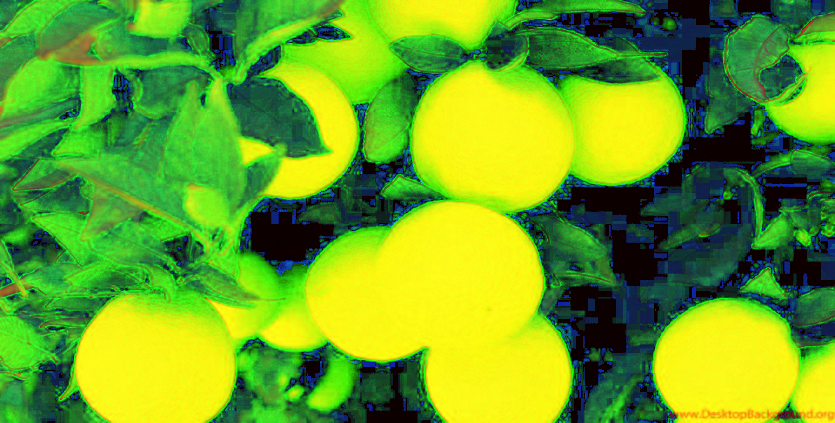

In [ ]:
# konversi BGR dari variable img ke colorspace HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

cv2_imshow(hsv)

# **Menampilkan histogram citra**

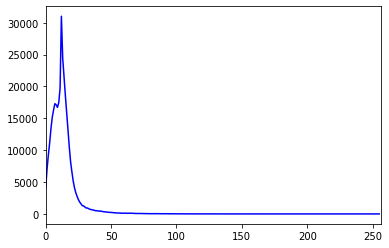

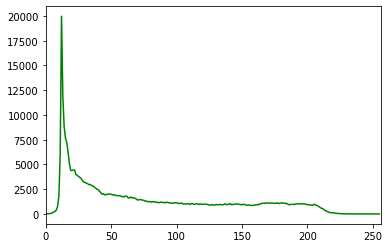

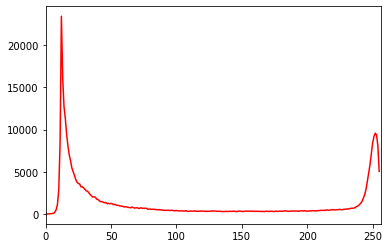

In [ ]:
# memanggil library yang dibutuhkan
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
# jika file baymax.jpg yang digunakan, hilangkan tanda komentar
# img = cv2.imread(‘Baymax.jpg')
 
color = ('b','g','r')
for i,col in enumerate(color):
 histr = cv2.calcHist([img],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])
 plt.show()


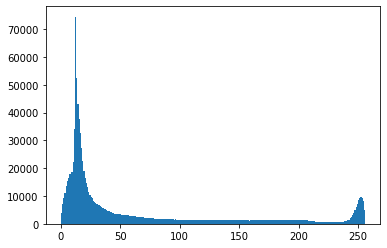

In [ ]:
# plotting menggunakan fungsi histogram dari pyplot
# ravel() adalah fungsi numpy untuk mengkonversi array menjadi flat array
# img.ravel() -> menampilkan histogram untuk band Hue (dari variabel pada cell sebelumnya)

plt.hist(img.ravel(),256,[0,256]);
plt.show()

# **Ekstraksi objek dengan warna menggunakan OpenCv**

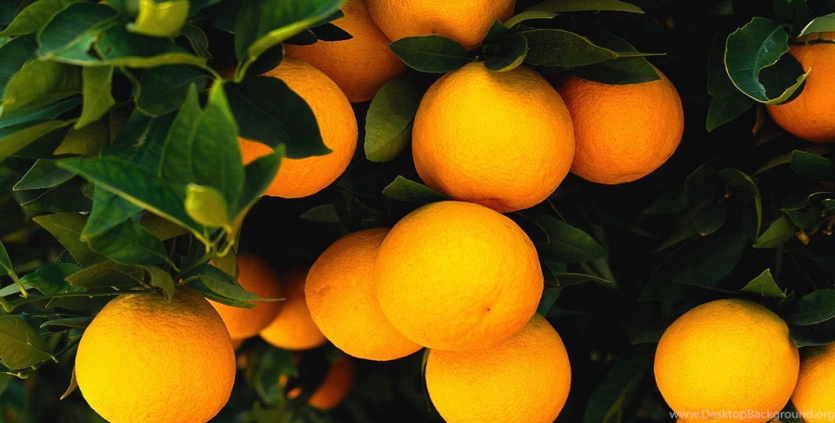

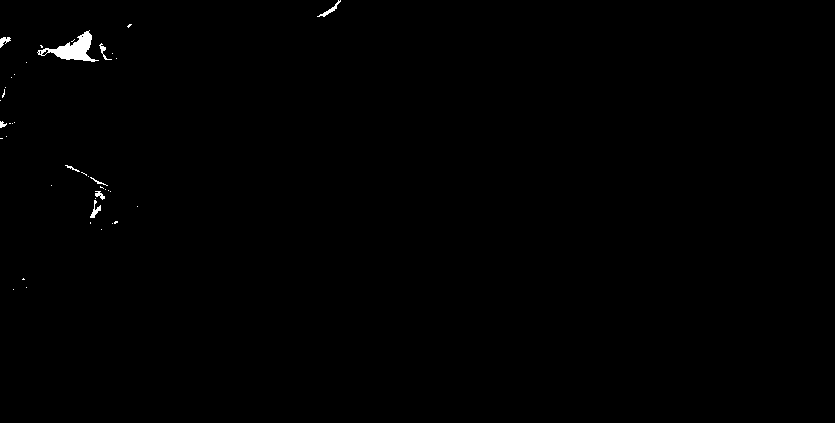

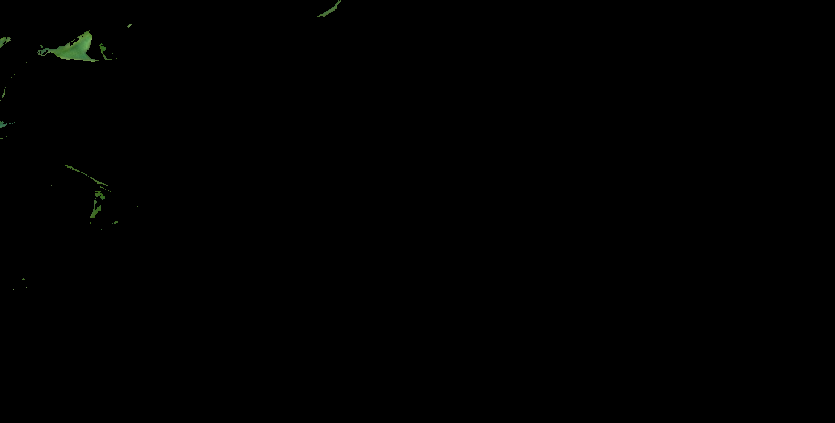

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
# Membaca citra 'orange.jpg' yang sudah diunggah sebelumnya.
img = cv2.imread('/content/orange.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);
 
# slider adalah salah satu fungsi Google Colab
# 3 dan 27 adalah batas warna orange pada band hue
# rubah slider untuk mencoba hasil akhir yang berbeda
batas_bawah = 46 #@param {type:"slider", min:0, max:360, step:1}
batas_atas = 78 #@param {type:"slider", min:0, max:360, step:1}
 
# definisi batas warna orange. perhatikan variabel batas_bawah dan batas_atas
lower_orange = np.array([batas_bawah,100,100])
upper_orange = np.array([batas_atas,255,255])
 
# membuat masking untuk mencari objek sesuai batas warna
mask = cv2.inRange(hsv, lower_orange, upper_orange)
 
# Operasi Bitwise-AND
res = cv2.bitwise_and(img, img, mask=mask)
# cetak hasil ke layar
#print("gambar asal")
cv2_imshow(img);
#print("masking warna")
cv2_imshow(mask)
#print("hasil operasi")
cv2_imshow(res)




# **Operasi pencerahan citra**

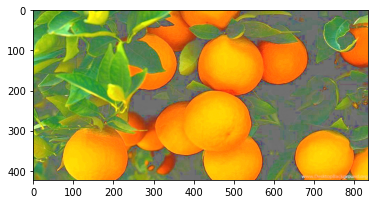

In [ ]:
import numpy as np
import math
 
img = cv2.imread('/content/orange.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
increase=100
 
v = img_hsv[:, :, 2]
v = np.where(v <= 255 - increase, v + increase, 255)
img_hsv[:, :, 2] = v
final_hsv=img_hsv
 
img_result = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
plt.imshow(img_result)
plt.show() #untuk menampilkan plot


## Hasil pencerahan yang lebih advance

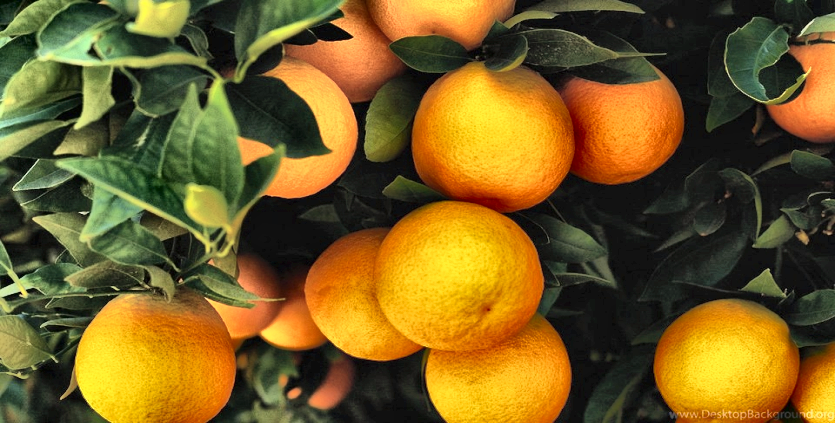

In [ ]:
import cv2
 
img = cv2.imread('/content/orange.jpg')
 
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
 
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels
 
l2 = clahe.apply(l)  # apply CLAHE to the L-channel
 
lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
